# Projeto Mulheres Vítimas Versão 3
## Classificação de municípios quanto ao risco de violência contra mulher


**João L. S. Júnior**\
Universidade Federal do Pará - UFPA \
Laboratório de Pesquisa Operacional - LPO\
Instituto Federal de Educação, Ciência e Tecnologia do Pará - IFPA\
Copyright(c) 2023.


---

Comunicação com API IBGE

In [18]:
from generators.IBGE_DataFetcher import IBGEDataFetcher

state = 'pa'  # Exemplo: Pará
fetcher = IBGEDataFetcher(state)
df_munic = fetcher.fetch_municipalites_info()
df_munic

,id,localidade,IAP,IDH,PIB,GINI
0,150010,Abaetetuba,0.45,0.628,9458.72,0.60
1,150013,Abel Figueiredo,0.47,0.622,11420.76,0.63
2,150020,Acará,0.12,0.506,13582.97,0.64
3,150030,Afuá,0.12,0.489,9405.70,0.61
4,150034,Água Azul do Norte,0.27,0.564,15819.85,0.63
...,...,...,...,...,...,...
139,150815,Uruará,0.15,0.589,13401.03,0.62
140,150820,Vigia,0.32,0.617,7216.02,0.64
141,150830,Viseu,0.47,0.515,7952.36,0.63
142,150835,Vitória do Xingu,0.00,0.596,270414.24,0.62


In [2]:
# if state == 'pa':
#     df_munic.drop(73, inplace=True)

In [19]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

df_munic_normalized = pd.DataFrame()

# Inicialize o MinMaxScaler
scaler = MinMaxScaler()

# Selecione as colunas a serem normalizadas (exceto 'id' e 'nome')
columns_to_normalize = ['IAP', 'IDH', 'PIB', 'GINI']


# Aplique o MinMaxScaler às colunas selecionadas
df_munic_normalized[columns_to_normalize] = scaler.fit_transform(df_munic[columns_to_normalize])

# Resultado normalizado
df_munic_normalized

,IAP,IDH,PIB,GINI
0,0.671642,0.841823,0.014360,0.895522
1,0.701493,0.833780,0.021286,0.940299
2,0.179104,0.678284,0.028919,0.955224
3,0.179104,0.655496,0.014173,0.910448
4,0.402985,0.756032,0.036816,0.940299
...,...,...,...,...
139,0.223881,0.789544,0.028277,0.925373
140,0.477612,0.827078,0.006443,0.955224
141,0.701493,0.690349,0.009042,0.940299
142,0.000000,0.798928,0.935595,0.925373


In [20]:
df_munic_normalized = df_rounded = df_munic_normalized.round(2)

df_munic_normalized

,IAP,IDH,PIB,GINI
0,0.67,0.84,0.01,0.90
1,0.70,0.83,0.02,0.94
2,0.18,0.68,0.03,0.96
3,0.18,0.66,0.01,0.91
4,0.40,0.76,0.04,0.94
...,...,...,...,...
139,0.22,0.79,0.03,0.93
140,0.48,0.83,0.01,0.96
141,0.70,0.69,0.01,0.94
142,0.00,0.80,0.94,0.93


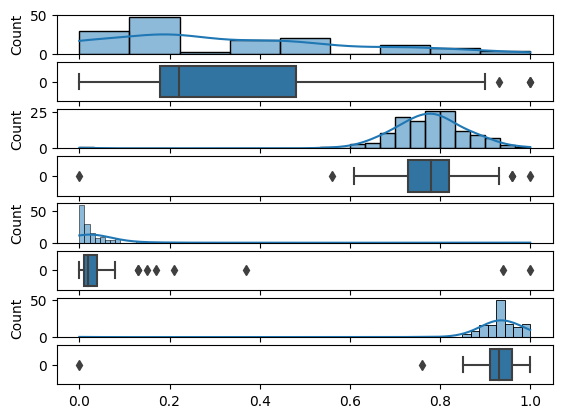

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

df = df_munic_normalized


p1 = df['IAP']
p2 = df['IDH']
p3 = df['PIB']
p4 = df['GINI']

fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8) = plt.subplots(8)
sns.histplot(p1, kde=True, ax=ax1)
sns.boxplot(p1, orient="h", ax=ax2)
sns.histplot(p2, kde=True, ax=ax3)
sns.boxplot(p2, orient="h", ax=ax4)
sns.histplot(p3, kde=True, ax=ax5)
sns.boxplot(p3, orient="h", ax=ax6)
sns.histplot(p4, kde=True, ax=ax7)
sns.boxplot(p4, orient="h", ax=ax8)
#plt.xlim(-1, 1)
plt.show()

In [21]:
def print_limits(dataset: pd.DataFrame) -> np.array:

    r = []
    r.append(df.quantile(0.25))
    r.append(df.quantile(0.75))
    r.append(df.quantile(0.90))

    return np.array(r)

In [24]:
df

,IAP,IDH,PIB,GINI
0,0.67,0.84,0.01,0.90
1,0.70,0.83,0.02,0.94
2,0.18,0.68,0.03,0.96
3,0.18,0.66,0.01,0.91
4,0.40,0.76,0.04,0.94
...,...,...,...,...
139,0.22,0.79,0.03,0.93
140,0.48,0.83,0.01,0.96
141,0.70,0.69,0.01,0.94
142,0.00,0.80,0.94,0.93


In [25]:
#B = print_limits(scaled_df.iloc[:,2:6]).tolist()
B = print_limits(df).tolist()

In [26]:
np.array(B)

array([[0.18, 0.73, 0.01, 0.91],
       [0.48, 0.82, 0.04, 0.96],
       [0.7 , 0.88, 0.07, 0.99]])

In [9]:
col = 'IAP'

# Crie as duas condições
condicao1 = df[col] <= 1.0
condicao2 = df[col] > 0.48

# Use o operador & (E) para combinar as duas condições
busca = condicao1 & condicao2

df[col].loc[busca].to_numpy()

array([0.67, 0.7 , 0.7 , 0.55, 0.78, 0.7 , 0.78, 0.55, 0.52, 0.9 , 0.85,
       0.55, 0.7 , 0.7 , 0.7 , 0.78, 1.  , 1.  , 0.7 , 0.7 , 0.7 , 0.78,
       0.93, 0.7 , 0.85, 0.55, 0.78, 0.52, 0.52, 0.85, 0.7 ])

In [10]:
np.array(B)

array([[0.18, 0.73, 0.01, 0.91],
       [0.48, 0.82, 0.04, 0.96],
       [0.7 , 0.88, 0.07, 0.99]])

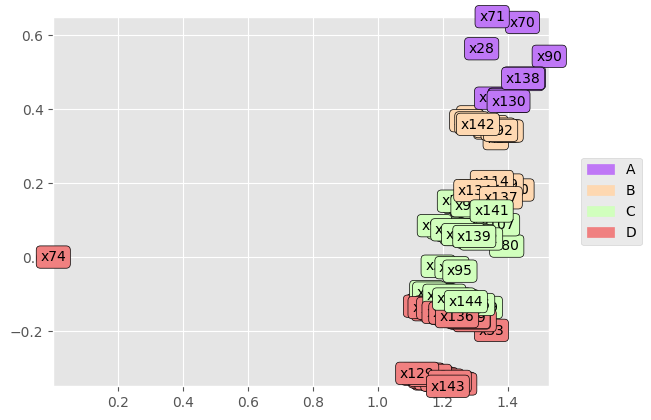

In [27]:
     #IP       #IDH      #PIB      #GINI

# Q = [0.00, 0.0, 0.0, 0.0]
# #P = [0.55]*4
# #P = [0.18, 0.18, 0.08, 0.15]
# P = [0.50, 0.15, 0.2, 0.3]
# V = [0.0]*4
# W = [0.6,     0.0,      0.0,     0.0]
# B = [[0.22, 0.60, 0.01, 0.70],
#      [0.45, 0.65, 0.02, 0.81],
#      [0.60, 0.69, 0.04, 0.84]]

# from pyDecision.algorithm import electre_tri_b

# classification = electre_tri_b(np.array(df), W , Q , P , V , B, cut_level = 0.65, verbose = False, rule = 'pc', graph = True)


Q = [0.0]*4
#P = [0.55]*4
#P = [0.18, 0.18, 0.08, 0.15]
P = [0.0]*4
V = [0.0]*4
W = [0.6,     0.0,      0.0,     0.0]


from pyDecision.algorithm import electre_tri_b

classification = electre_tri_b(np.array(df), W , Q , P , V , B, cut_level = 0.65, verbose = False, rule = 'pc', graph = True)

In [33]:
df_munic_classified = df_munic.copy()
df_munic_classified['class'] = classification
df_munic_classified.to_parquet("datasets/df_classified_pa.parquet")
df_munic_classified

,id,localidade,IAP,IDH,PIB,GINI,class
0,150010,Abaetetuba,0.45,0.628,9458.72,0.60,1
1,150013,Abel Figueiredo,0.47,0.622,11420.76,0.63,1
2,150020,Acará,0.12,0.506,13582.97,0.64,3
3,150030,Afuá,0.12,0.489,9405.70,0.61,3
4,150034,Água Azul do Norte,0.27,0.564,15819.85,0.63,2
...,...,...,...,...,...,...,...
139,150815,Uruará,0.15,0.589,13401.03,0.62,2
140,150820,Vigia,0.32,0.617,7216.02,0.64,2
141,150830,Viseu,0.47,0.515,7952.36,0.63,1
142,150835,Vitória do Xingu,0.00,0.596,270414.24,0.62,3


In [14]:
# Calcula a contagem de cada classificação
class_counts = df_munic_classified['class'].value_counts().reset_index()
class_counts.columns = ['class', 'count']

class_counts

,class,count
0,3,61
1,2,52
2,1,19
3,0,12


In [38]:
# Acc = 8.1
# Required Libraries
import numpy as np
import pandas as pd


from electre_tree import tree_e_tri_b , util_e_tri_b
from sklearn.model_selection import train_test_split

dataset = df

countries = df_munic['localidade']
X         = dataset.values

#View Dataset
np.around(X[0:10, :], decimals = 2)

# ok - Para domingo - aumentar o número de classes e inserir o target.
# ok - aumentar o número de gerações.
#    - aumentar o tamanho da amostra e a população
#    - Aumentar elite

# Parameters - ELECTRE Tree
rule      = 'pc'
classes   = 4
#target    = classification
target    = []

cut_level = [0.5, 1.0]
Q         = [] # [0.0]*4
P         = []
V         = [] #[0.0]*4
W         = [0.6,     0.0,      0.0,     0.0]
B         = []
models    = 50 # 200

# Parameters - GA
elite       = 3 #     1
eta         = 1 #     1
mu          = 1 #     1
size        = 40 #    15
rate        = 0.05 #  0.05
generations = 30 #    30
samples     = 0.10 #  10

In [42]:
# Required Libraries
import numpy as np
import pandas as pd


from electre_tree import tree_e_tri_b , util_e_tri_b
from sklearn.model_selection import train_test_split

dataset = df

countries = df_munic['localidade']
X         = dataset.values

#View Dataset
np.around(X[0:10, :], decimals = 2)

# ok - Para domingo - aumentar o número de classes e inserir o target.
# ok - aumentar o número de gerações.
#    - aumentar o tamanho da amostra e a população
#    - Aumentar elite

# Parameters - ELECTRE Tree
rule      = 'pc'
classes   = 4
target    = classification
# target    = []

cut_level = [0.5, 1.0]
Q         = [] #[0.15, 0.12, 0.11, 0.12]
P         = [] #[0.22, 0.14, 0.17, 0.24]
V         = [] #[0.44, 0.27, 0.22, 0.35]
W         = [0.6,     0.0,      0.0,     0.0]
B         = []
models    = 10 # 200

# Acc = 8.6
# Parameters - GA
elite       = 2 #     1 
eta         = 1 #     1
mu          = 1 #     1
size        = 15 #    15
rate        = 0.2 #  0.05
generations = 30 #    30
samples     = 0.10 #  10




In [43]:


models = tree_e_tri_b.tree_electre_tri_b(
    X, 
    target_assignment = target, 
    W = W, 
    Q = Q, 
    P = P, 
    V = V, 
    B = B, 
    cut_level = cut_level, 
    rule = rule, 
    number_of_classes = classes, 
    elite = elite, 
    eta = eta, mu = mu, 
    population_size = size, 
    mutation_rate = rate, 
    generations = generations, 
    samples = samples, 
    number_of_models = models)   



Model # 1
Model # 2
Model # 3
Model # 4
Model # 5
Model # 6
Model # 7
Model # 8
Model # 9
Model # 10


Salva o modelo treinado

In [770]:
#modelsdf = pd.DataFrame(models)

#modelsdf.to_parquet("datasets/models_pa.parquet")



In [44]:
# Predict
prediction, solutions = tree_e_tri_b.predict(models, X, verbose = False, rule = rule)

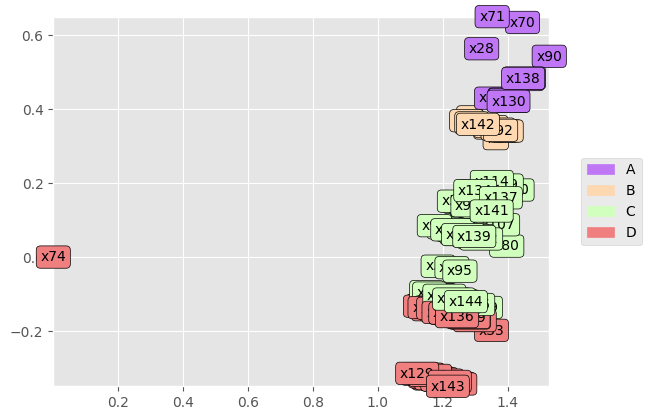

In [45]:
# Plot - Tree Model
util_e_tri_b.plot_points(X, prediction)

In [52]:
# Elicitated Paramneters
w_mean, w_std, q_mean, q_std, p_mean, p_std, v_mean, v_std, b_mean, b_std, cut_mean, cut_std, acc_mean, acc_std = tree_e_tri_b.metrics(models, number_of_classes = classes) 

print('Criteria Weights: ', np.around(w_mean, decimals = 2))
print('Q: ', np.around(q_mean, decimals = 2))
print('P: ', np.around(p_mean, decimals = 2))
print('V: ', np.around(v_mean, decimals = 2))
for i in range(0, len(b_mean)):
  print('b'+str(i+1)+': ', np.around(b_mean[i], decimals = 2))
print('Lambda Cutoff: ', round(cut_mean,  2))
print('Accuracy: ',      round(acc_mean,  2))

Criteria Weights:  [0.6 0.  0.  0. ]
Q:  [0.05 0.04 0.01 0.11]
P:  [0.08 0.12 0.04 0.11]
V:  [0.33 0.13 0.2  0.11]
b1:  [0.18 0.75 0.25 0.78]
b2:  [0.53 0.82 0.27 0.82]
b3:  [0.65 0.87 0.27 0.9 ]
Lambda Cutoff:  0.77
Accuracy:  0.89


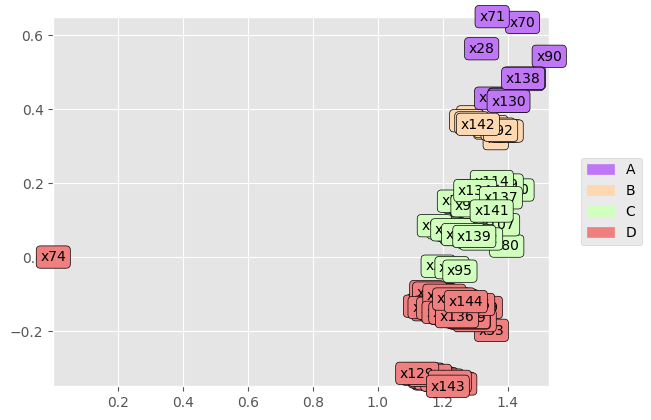

In [53]:
# Plot - Elicitated Parameters
e_tri = util_e_tri_b.electre_tri_b(X, W = w_mean, Q = q_mean, P = p_mean, V = v_mean, B = b_mean, cut_level = cut_mean, verbose = False, rule = rule, graph = True)

In [775]:
# Plot Tree Model - Decision Boundaries
#tree_e_tri_b.plot_decision_boundaries(X, models)  

In [776]:
# # Plot Mean Model - Decision Boundaries  (Limites de Decisão)
# model_mean = []
# model_mean.append([w_mean, acc_mean, [], [], [], b_mean, cut_mean, [], [], q_mean, p_mean, v_mean])
# tree_e_tri_b.plot_decision_boundaries(X, model_mean)

In [33]:
X

array([[0.67, 0.64, 0.01, 0.56],
       [0.7 , 0.62, 0.02, 0.75],
       [0.18, 0.27, 0.03, 0.81],
       [0.18, 0.22, 0.01, 0.63],
       [0.4 , 0.45, 0.04, 0.75],
       [0.18, 0.45, 0.02, 0.63],
       [0.7 , 0.68, 0.04, 0.  ],
       [0.18, 0.75, 0.07, 0.56],
       [0.48, 0.2 , 0.01, 0.81],
       [0.55, 0.91, 0.04, 0.69],
       [0.4 , 0.4 , 0.03, 0.56],
       [0.4 , 0.31, 0.01, 0.56],
       [0.78, 0.31, 0.01, 0.81],
       [0.7 , 0.38, 0.01, 0.81],
       [0.18, 0.16, 0.  , 0.75],
       [0.48, 0.49, 0.02, 0.75],
       [0.  , 0.54, 0.07, 0.69],
       [0.78, 0.74, 0.13, 0.5 ],
       [0.55, 1.  , 0.06, 0.38],
       [0.  , 0.52, 0.01, 0.94],
       [0.  , 0.75, 0.07, 0.75],
       [0.  , 0.52, 0.02, 0.56],
       [0.  , 0.39, 0.02, 1.  ],
       [0.22, 0.55, 0.01, 0.69],
       [0.  , 0.59, 0.05, 0.88],
       [0.  , 0.53, 0.02, 0.69],
       [0.52, 0.46, 0.01, 0.69],
       [0.9 , 0.26, 0.01, 0.56],
       [0.48, 0.41, 0.03, 0.69],
       [0.3 , 0.17, 0.  , 0.88],
       [0.